In [1]:
import pandas as pd
data = pd.read_csv("wine.csv")
data



,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
y = data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: target, Length: 178, dtype: int64

In [3]:
X = data[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']]

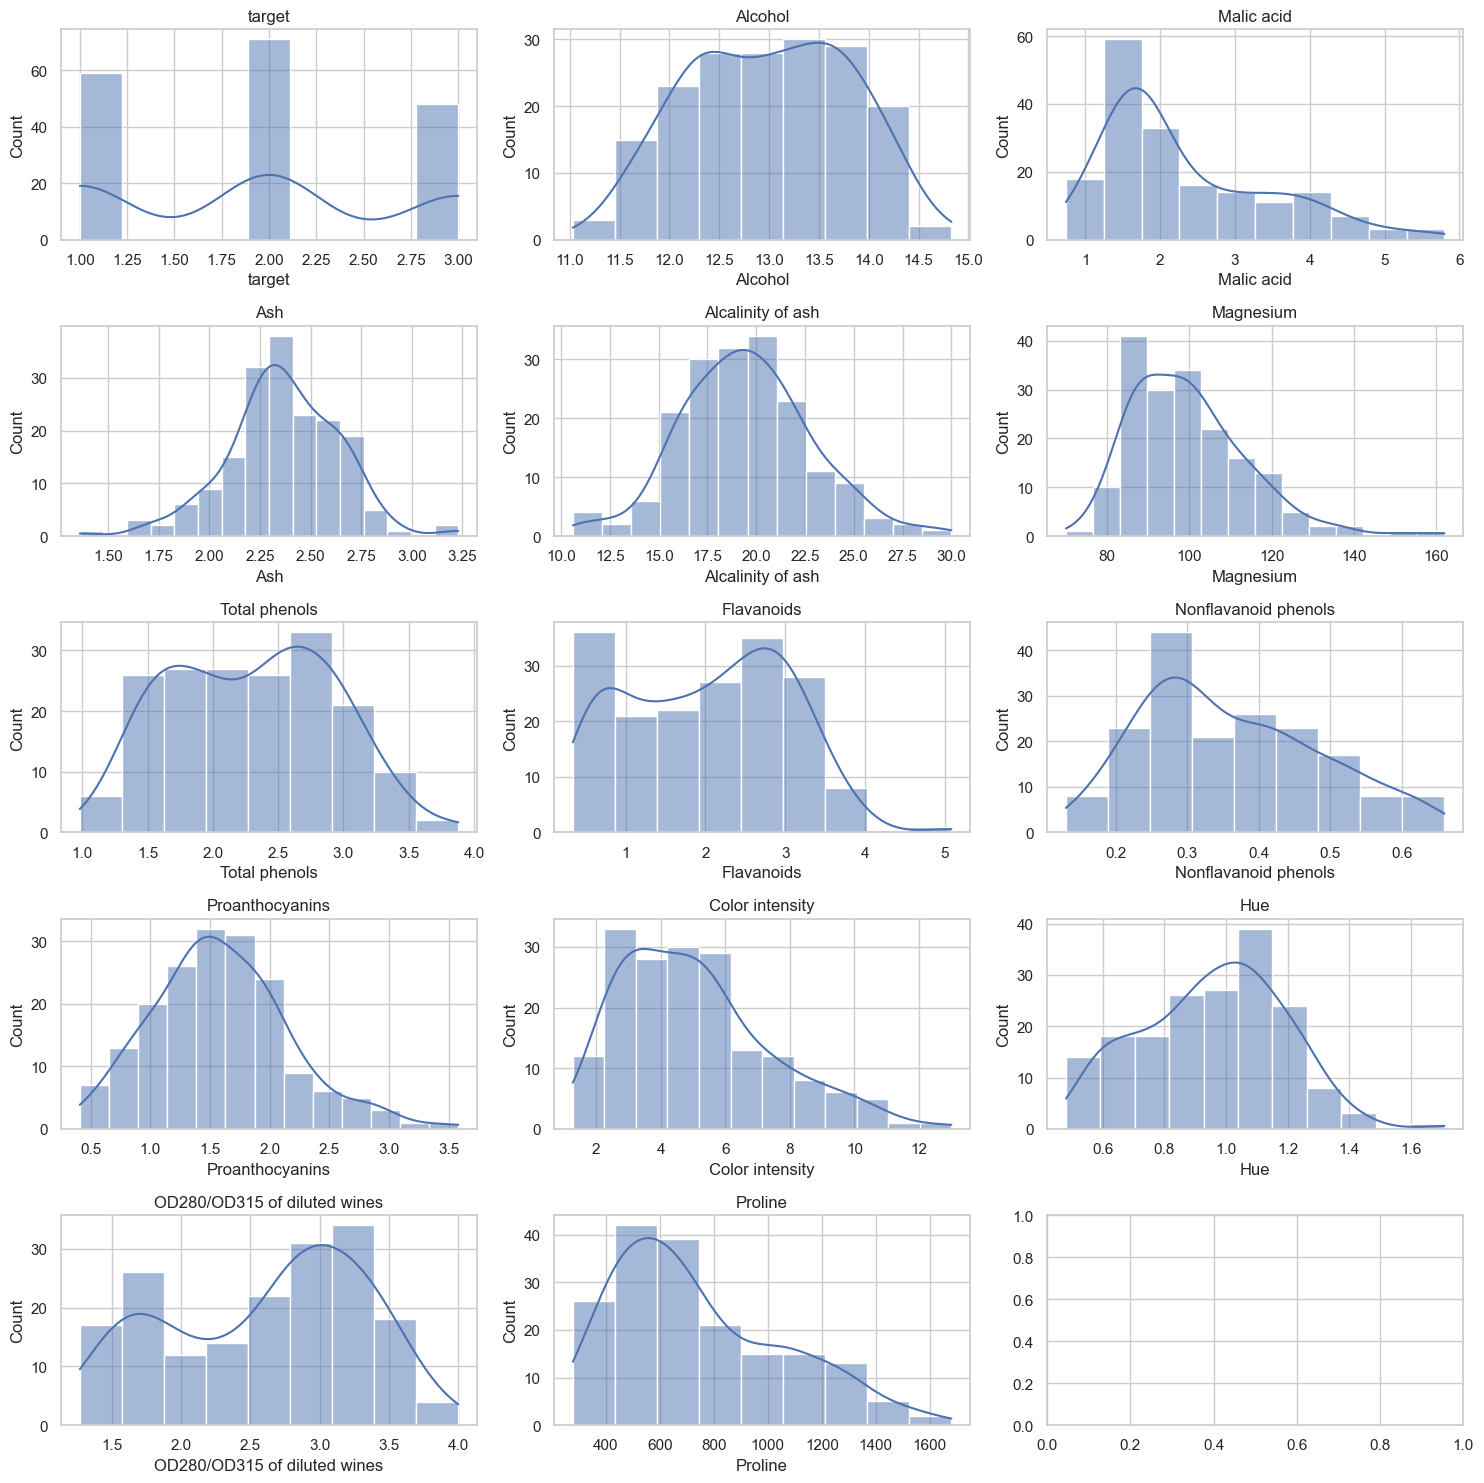

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
n_cols = 3
n_rows = (len(data.columns) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

axes = axes.flatten()
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [5]:
columns_to_discretize = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
for col in columns_to_discretize:
    data[col] = pd.cut(data[col], bins=3)


In [6]:
import bnlearn as bn
structure = bn.structure_learning.fit(data)
parameter = bn.parameter_learning.fit(structure, data)
print(parameter)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+---------------------------+-----+--------------------+
| target                    | ... | target(3)          |
+---------------------------+-----+--------------------+
|

In [7]:
print(structure)

{'model': <pgmpy.base.DAG.DAG object at 0x0000029E0BA41650>, 'model_edges': [('target', 'Flavanoids'), ('target', 'Proline'), ('target', 'Hue'), ('target', 'Alcohol'), ('target', 'Color intensity'), ('target', 'Malic acid'), ('target', 'Alcalinity of ash'), ('target', 'Magnesium'), ('target', 'Ash'), ('Alcalinity of ash', 'Ash'), ('Flavanoids', 'Total phenols'), ('Flavanoids', 'Proanthocyanins'), ('Flavanoids', 'Nonflavanoid phenols'), ('OD280/OD315 of diluted wines', 'target')], 'adjmat': target                        target  Alcohol  Malic acid    Ash  \
source                                                             
target                         False     True        True   True   
Alcohol                        False    False       False  False   
Malic acid                     False    False       False  False   
Ash                            False    False       False  False   
Alcalinity of ash              False    False       False   True   
Magnesium                    

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


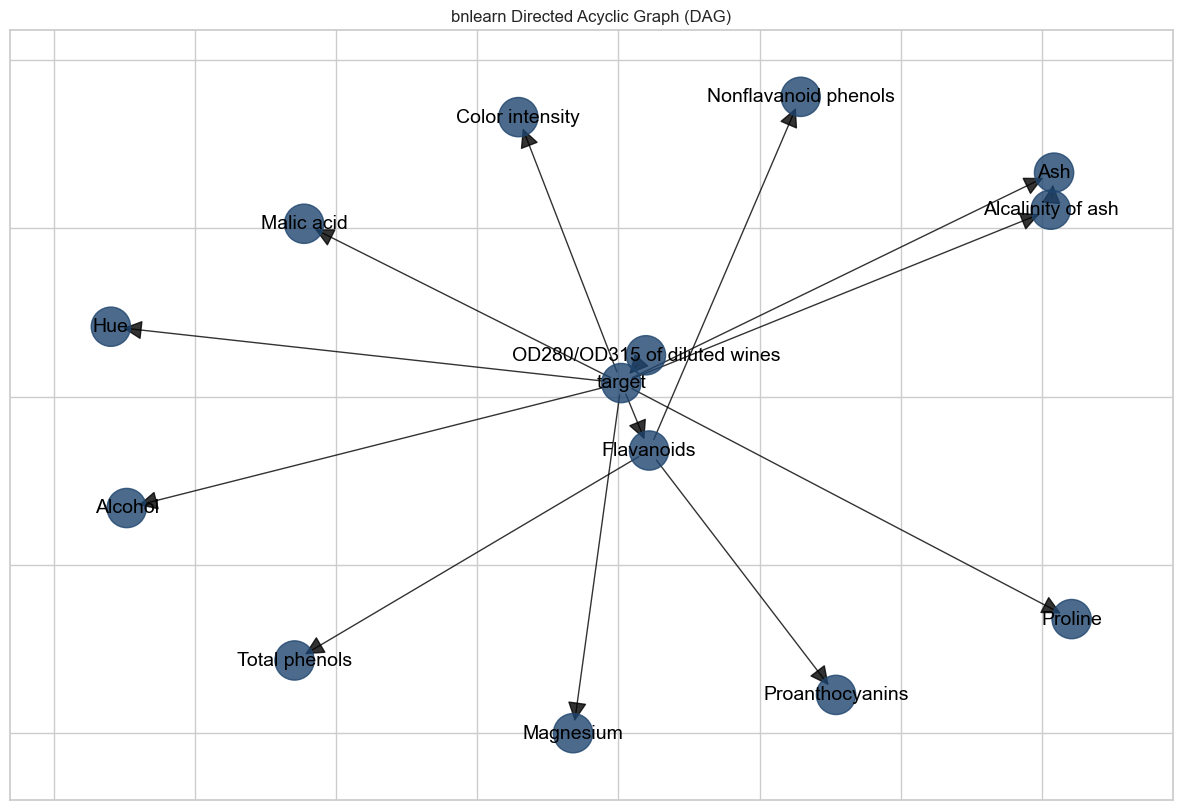

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'target': array([0.00521088, 0.04002061]),
  'Alcohol': array([-0.87066674, -0.33124479]),
  'Malic acid': array([-0.55655234,  0.51317955]),
  'Ash': array([0.77156982, 0.66504078]),
  'Alcalinity of ash': array([0.76562372, 0.55492722]),
  'Magnesium': array([-0.0802057, -1.       ]),
  'Total phenols': array([-0.5734259 , -0.78400654]),
  'Flavanoids': array([ 0.05437943, -0.16042623]),
  'Nonflavanoid phenols': array([0.32286289, 0.89020676]),
  'Proanthocyanins': array([ 0.38548803, -0.88631457]),
  'Color intensity': array([-0.17710174,  0.82987744]),
  'Hue': array([-0.89868866,  0.20730635]),
  'OD280/OD315 of diluted wines': array([0.04883459, 0.12254893]),
  'Proline': array([ 0.80267173, -0.66111548])},
 'G': <networkx.classes.digraph.DiGraph at 0x29e0ba8e990>,
 'node_properties': {'target': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456e', 'nod

In [8]:
bn.plot(structure)

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


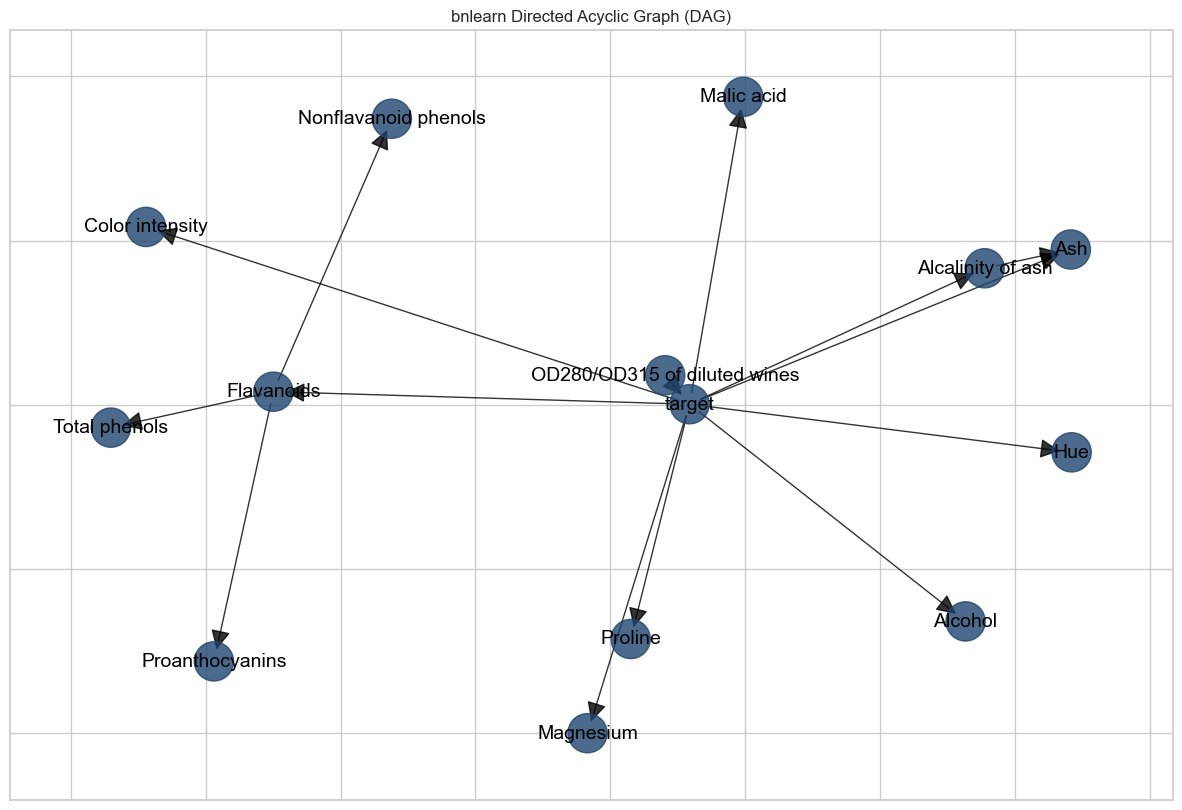

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'target': array([0.14683873, 0.00164505]),
  'Alcohol': array([ 0.65840042, -0.65962905]),
  'Malic acid': array([0.24626802, 0.93753732]),
  'Ash': array([0.85353917, 0.47267554]),
  'Alcalinity of ash': array([0.69378326, 0.4154432 ]),
  'Magnesium': array([-0.04234682, -1.        ]),
  'Total phenols': array([-0.92580698, -0.06974175]),
  'Flavanoids': array([-0.62455787,  0.03974283]),
  'Nonflavanoid phenols': array([-0.40504416,  0.8708056 ]),
  'Proanthocyanins': array([-0.73476892, -0.78136907]),
  'Color intensity': array([-0.8606386 ,  0.54136075]),
  'Hue': array([ 0.85499648, -0.14493339]),
  'OD280/OD315 of diluted wines': array([0.10161138, 0.08971459]),
  'Proline': array([ 0.03772588, -0.71325163])},
 'G': <networkx.classes.digraph.DiGraph at 0x29e0bb60f50>,
 'node_properties': {'target': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456e', 'n

In [9]:
bn.plot(parameter)

In [13]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BicScore

bic = BicScore(data)
bic_score = bic.score(structure)
print("BIC Score:", bic_score)

AttributeError: 'dict' object has no attribute 'nodes'